In [1]:
# pip install dython

In [2]:
pip install langdetect

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'D:\Softwares\Anaconda\python.exe -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from dython.nominal import associations
from langdetect import detect
import altair as alt

In [4]:
# !pip install altair

In [5]:
# import os
# os.getcwd()

In [6]:
df = pd.read_excel('data_preprocessed.xlsx')

In [7]:
df.columns

Index(['Account Name', 'Campaign ID', 'Campaign Name', 'Campaign Status',
       'Cost Type', 'Daily Budget', 'Total Budget', 'Creative Name', 'Ad ID',
       'Creative Status', 'Ad Introduction Text', 'Ad Headline', 'Click URL',
       'Total Spent', 'Impressions', 'Clicks', 'Click Through Rate',
       'Average CPM', 'Average CPC', 'Reactions', 'Comments', 'Shares',
       'Follows', 'Other Clicks', 'Total Social Actions', 'Total Engagements',
       'Engagement Rate', 'Viral Impressions', 'Viral Clicks',
       'Viral Reactions', 'Viral Follows', 'Viral Other Clicks', 'Leads',
       'Lead Forms Opened', 'Lead Form Completion Rate', 'Cost per Lead',
       'Reach', 'Average Frequency', 'Cost per 1,000 People Reached',
       'Campaign Objective', 'Campaign Start Date', 'Campaign End Date',
       'Clicks to Landing Page', 'Clicks to LinkedIn Page',
       'Campaign Group ID', 'Campaign Group Name', 'local_zone', 'asset_type',
       'content_topic', 'country'],
      dtype='object')

In [8]:
### adding column "language"
df.dropna(subset = ['Ad Introduction Text'], inplace = True)
df['language'] = df['Ad Introduction Text'].apply(detect)

### **Does Language of campaign have any effect over the leads/Outcome?**

In [9]:
df.groupby('country')['language'].apply(set)
#Conclusion - Only a single language spoken in every country, so NO

country
BNL             {en}
DACH            {de}
DE              {de}
ES              {es}
FR              {fr}
IT              {it}
NDC             {en}
Nigeria         {en}
South Africa    {en}
Turkey          {en}
UK              {en}
Name: language, dtype: object

In [10]:
### Adding column "campaign duration"
df["campaign_duration"] = df['Campaign End Date'] - df['Campaign Start Date']

In [11]:
### Adding new columns for headline and topic length
df['Intro_text_len'] = df['Ad Introduction Text'].str.len()
df['Headline_text_len'] = df['Ad Headline'].str.len()

In [12]:
### adding column for checking the length of Intro_text is < 200 or not
def function(row):
    if row['Intro_text_len'] <= 200:
        val = 1
    else:
        val = 0
    return val

df['visibility'] = df.apply(function, axis=1)

In [13]:
# Lead per impressions: leads / impressions
df['LPI'] = df['Leads'] / df['Impressions'] * 100

# Lead per Reach
df['LPR'] = df['Leads'] / df['Reach'] * 100

# Lead per clicks: leads / clicks
df['LPC'] = df['Leads'] / df['Clicks'] 
df.head()

,Account Name,Campaign ID,Campaign Name,Campaign Status,Cost Type,Daily Budget,Total Budget,Creative Name,Ad ID,Creative Status,...,content_topic,country,language,campaign_duration,Intro_text_len,Headline_text_len,visibility,LPI,LPR,LPC
0,Siemens Digital Industries EMEA,159178256,TAC_002.011_GBL_WBNR_Realistic IoT vs Visionar...,Completed,CPM,NaN,559.0,120196884,120196884,Paused,...,Realistic IoT vs Visionary,BNL,en,32 days,219,79,0,0.0,0.0,0.0
1,Siemens Digital Industries EMEA,159178256,TAC_002.011_GBL_WBNR_Realistic IoT vs Visionar...,Completed,CPM,NaN,559.0,120912804,120912804,Active,...,Realistic IoT vs Visionary,BNL,en,32 days,219,79,0,0.0,0.0,0.0
2,Siemens Digital Industries EMEA,159178256,TAC_002.011_GBL_WBNR_Realistic IoT vs Visionar...,Completed,CPM,NaN,559.0,120912854,120912854,Active,...,Realistic IoT vs Visionary,BNL,en,32 days,276,79,0,0.0,0.0,0.0
3,Siemens Digital Industries EMEA,159178256,TAC_002.011_GBL_WBNR_Realistic IoT vs Visionar...,Completed,CPM,NaN,559.0,120912874,120912874,Active,...,Realistic IoT vs Visionary,BNL,en,32 days,276,79,0,0.0,0.0,0.0
4,Siemens Digital Industries EMEA,159178256,TAC_002.011_GBL_WBNR_Realistic IoT vs Visionar...,Completed,CPM,NaN,559.0,120912904,120912904,Active,...,Realistic IoT vs Visionary,BNL,en,32 days,219,79,0,0.0,0.0,0.0


In [14]:
df.columns

Index(['Account Name', 'Campaign ID', 'Campaign Name', 'Campaign Status',
       'Cost Type', 'Daily Budget', 'Total Budget', 'Creative Name', 'Ad ID',
       'Creative Status', 'Ad Introduction Text', 'Ad Headline', 'Click URL',
       'Total Spent', 'Impressions', 'Clicks', 'Click Through Rate',
       'Average CPM', 'Average CPC', 'Reactions', 'Comments', 'Shares',
       'Follows', 'Other Clicks', 'Total Social Actions', 'Total Engagements',
       'Engagement Rate', 'Viral Impressions', 'Viral Clicks',
       'Viral Reactions', 'Viral Follows', 'Viral Other Clicks', 'Leads',
       'Lead Forms Opened', 'Lead Form Completion Rate', 'Cost per Lead',
       'Reach', 'Average Frequency', 'Cost per 1,000 People Reached',
       'Campaign Objective', 'Campaign Start Date', 'Campaign End Date',
       'Clicks to Landing Page', 'Clicks to LinkedIn Page',
       'Campaign Group ID', 'Campaign Group Name', 'local_zone', 'asset_type',
       'content_topic', 'country', 'language', 'campaign_

### Exploring Question --- effect of number of advertisements on a particular campaign

In [15]:
df_campaign = df.copy()

df_campaign["Campaign Name"].value_counts()

Nordics                                                      182
UK                                                           180
Benelux                                                      171
South Africa                                                  57
Spain                                                         54
                                                            ... 
WBNR Lead BEN                                                  2
TAC_002.012_GBL_EBK_Hyperautomation [UK - website visits]      2
WBNR Clic UK                                                   2
PON51042_OD_Flexible Manufacturing (UK, BNL, NDC)              2
PON51042_OD_Webinars Collection CPG                            2
Name: Campaign Name, Length: 71, dtype: int64

In [16]:
df_campaign["Campaign Name"].nunique()

71

In [17]:
df_campaign["Campaign ID"].value_counts()

177154444    64
177192844    64
177192924    63
173518254    32
175045844    31
             ..
160615736     2
164041286     2
169503456     2
169498016     2
164041356     2
Name: Campaign ID, Length: 112, dtype: int64

In [18]:
df_campaign.columns

Index(['Account Name', 'Campaign ID', 'Campaign Name', 'Campaign Status',
       'Cost Type', 'Daily Budget', 'Total Budget', 'Creative Name', 'Ad ID',
       'Creative Status', 'Ad Introduction Text', 'Ad Headline', 'Click URL',
       'Total Spent', 'Impressions', 'Clicks', 'Click Through Rate',
       'Average CPM', 'Average CPC', 'Reactions', 'Comments', 'Shares',
       'Follows', 'Other Clicks', 'Total Social Actions', 'Total Engagements',
       'Engagement Rate', 'Viral Impressions', 'Viral Clicks',
       'Viral Reactions', 'Viral Follows', 'Viral Other Clicks', 'Leads',
       'Lead Forms Opened', 'Lead Form Completion Rate', 'Cost per Lead',
       'Reach', 'Average Frequency', 'Cost per 1,000 People Reached',
       'Campaign Objective', 'Campaign Start Date', 'Campaign End Date',
       'Clicks to Landing Page', 'Clicks to LinkedIn Page',
       'Campaign Group ID', 'Campaign Group Name', 'local_zone', 'asset_type',
       'content_topic', 'country', 'language', 'campaign_

In [19]:
ads_num =df_campaign.groupby(['Campaign ID','language']).agg({'Ad ID':'count', 
                                                              'LPI':'sum', 'LPC':'sum','LPR':'sum', 
                                                              'Leads':'sum', 'Reach':'sum',
                                                            'Impressions':'sum'}).reset_index()
ads_num

,Campaign ID,language,Ad ID,LPI,LPC,LPR,Leads,Reach,Impressions
0,159178256,en,6,0.000000,0.000000,0.000000,0,13206,27644
1,159178306,en,3,0.000000,0.000000,0.000000,0,14793,18413
2,160610046,en,2,0.000000,0.000000,0.000000,0,27883,45571
3,160615356,en,2,0.125210,0.276754,0.140783,32,44571,52480
4,160615736,en,2,0.000000,0.000000,0.000000,0,30360,62979
...,...,...,...,...,...,...,...,...,...
107,182409894,en,6,0.193819,0.611111,0.245941,3,6625,8634
108,182411634,en,6,0.000000,0.000000,0.000000,0,8892,11098
109,182411944,en,6,0.295057,0.600000,0.329848,3,5000,5391
110,182466574,es,6,0.391269,0.907215,0.456913,16,17354,20595


<Figure size 720x576 with 0 Axes>

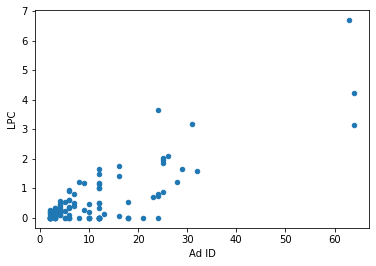

In [20]:
# Ad_count with LPC
plt.figure(figsize = (10,8))
ads_num.plot(kind = "scatter", x= "Ad ID", y ="LPC")
plt.show()

<Figure size 720x576 with 0 Axes>

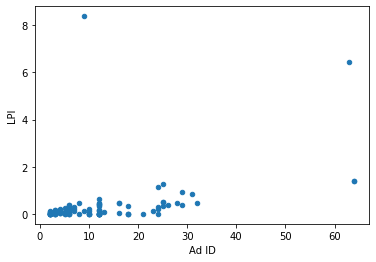

In [21]:
plt.figure(figsize = (10,8))
ads_num.plot(kind = "scatter", x= "Ad ID", y ="LPI")
plt.show()

<Figure size 720x576 with 0 Axes>

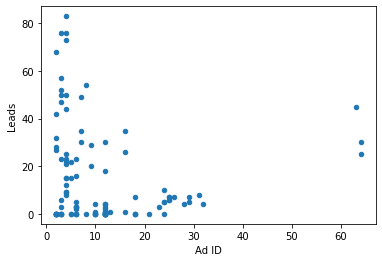

In [22]:
plt.figure(figsize = (10,8))
ads_num.plot(kind = "scatter", x= "Ad ID", y ="Leads")
plt.show()

<Figure size 720x576 with 0 Axes>

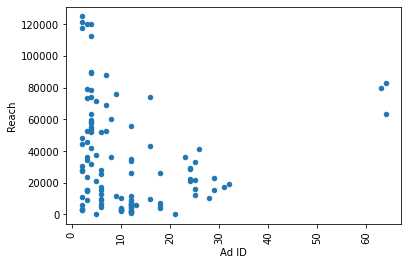

In [23]:
plt.figure(figsize = (10,8))
ads_num.plot(kind = "scatter", x = "Ad ID", y ="Reach")
plt.xticks(rotation = 90)
plt.show()

###  language with # of ads

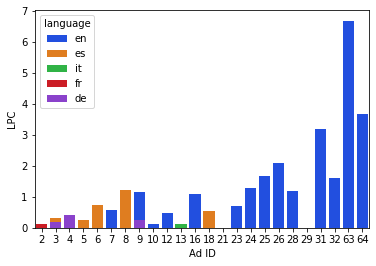

In [24]:
# lPC
sns.barplot(x = "Ad ID" , y = "LPC", hue = 'language', dodge = False, 
            errwidth=0, data = ads_num, palette="bright")
plt.show()

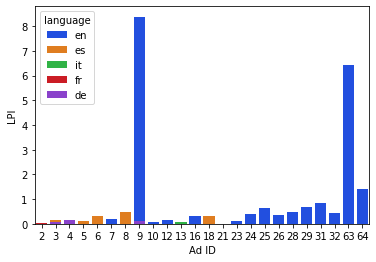

In [25]:
# lPI
sns.barplot(x = "Ad ID" , y = "LPI", hue = 'language', dodge = False, 
            errwidth=0, data = ads_num, palette="bright")
plt.show()

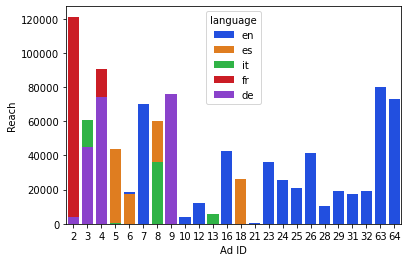

In [26]:
# Reach
sns.barplot(x = "Ad ID" , y = "Reach", hue = 'language', dodge = False, 
            errwidth=0, data = ads_num, palette="bright")
plt.show()

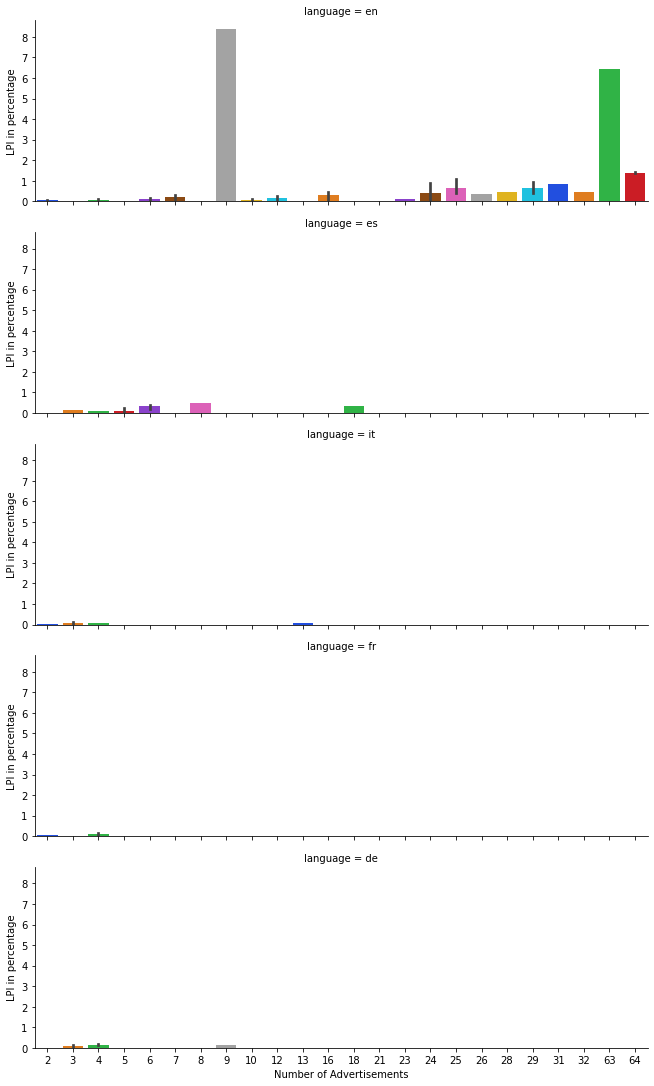

In [27]:
g = sns.catplot(x="Ad ID", y="LPI",
            row="language", kind = 'bar', data = ads_num, palette="bright",
            height=3 , aspect = 3, legend=True)
g.set_axis_labels("Number of Advertisements", "LPI in percentage")

### Country Wise ---- effect of # of ads

In [28]:
ads_country = df_campaign.groupby(['Campaign ID','country']).agg({'Ad ID':'count', 'LPI':'sum', 'LPC':'sum',
                                                                'Leads':'sum', 'Reach':'sum', 'Impressions':'sum',
                                                                 'LPR':'sum'}).reset_index()

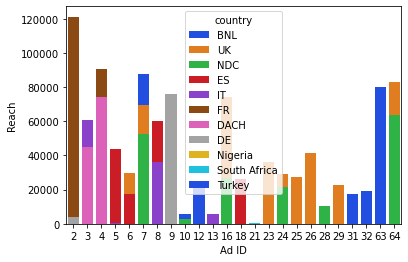

In [29]:
# Reach
sns.barplot(x = "Ad ID" , y = "Reach", hue = 'country', dodge = False, 
            errwidth=0, data = ads_country, palette="bright")
plt.show()

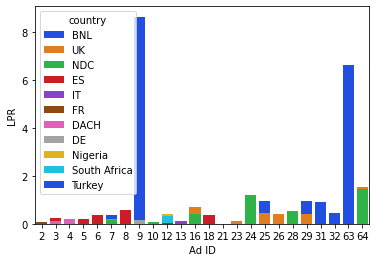

In [30]:
# LPR
sns.barplot(x = "Ad ID" , y = "LPR", hue = 'country', dodge = False, 
            errwidth=0, data = ads_country, palette="bright")
plt.show()

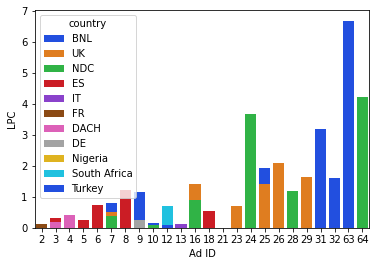

In [31]:
# LPC
sns.barplot(x = "Ad ID" , y = "LPC", hue = 'country', dodge = False, 
            errwidth=0, data = ads_country, palette="bright")
plt.show()

## other catplots

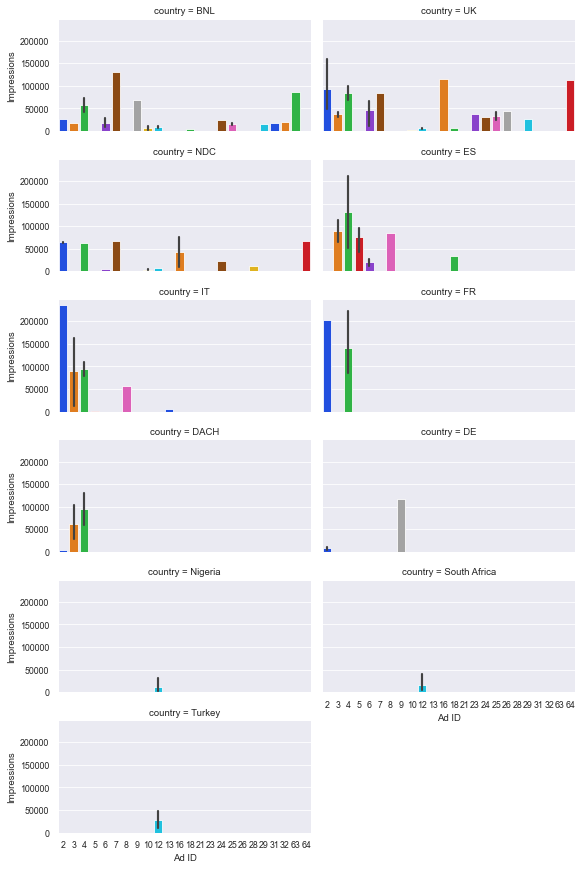

In [32]:
sns.set_theme("paper")
sns.catplot(x="Ad ID", y="Impressions",
            col="country", kind = 'bar', data = ads_country,
            palette="bright", col_wrap=2, 
            height=2, aspect=2)

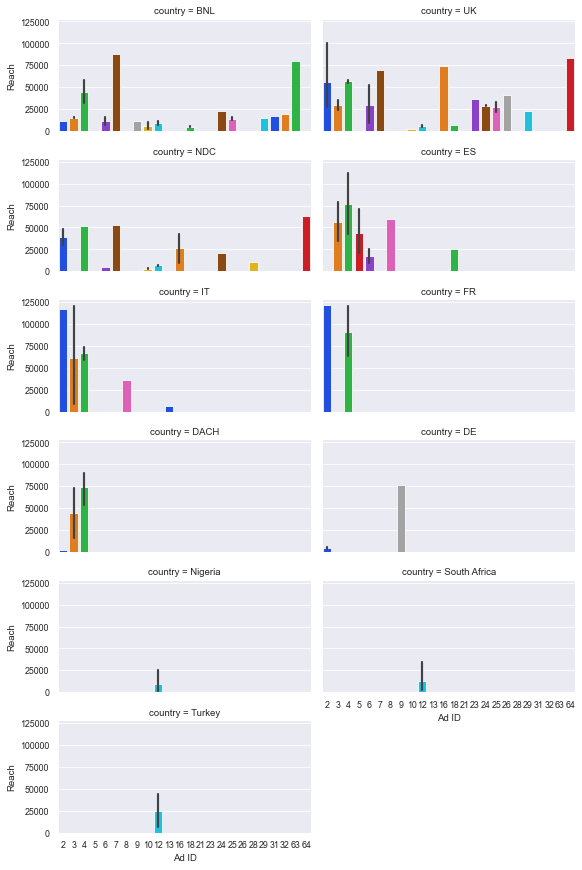

In [33]:
sns.catplot(x="Ad ID", y="Reach",
            col="country", kind = 'bar', data = ads_country, 
            palette="bright", col_wrap=2, 
            height=2, aspect=2)
plt.show()

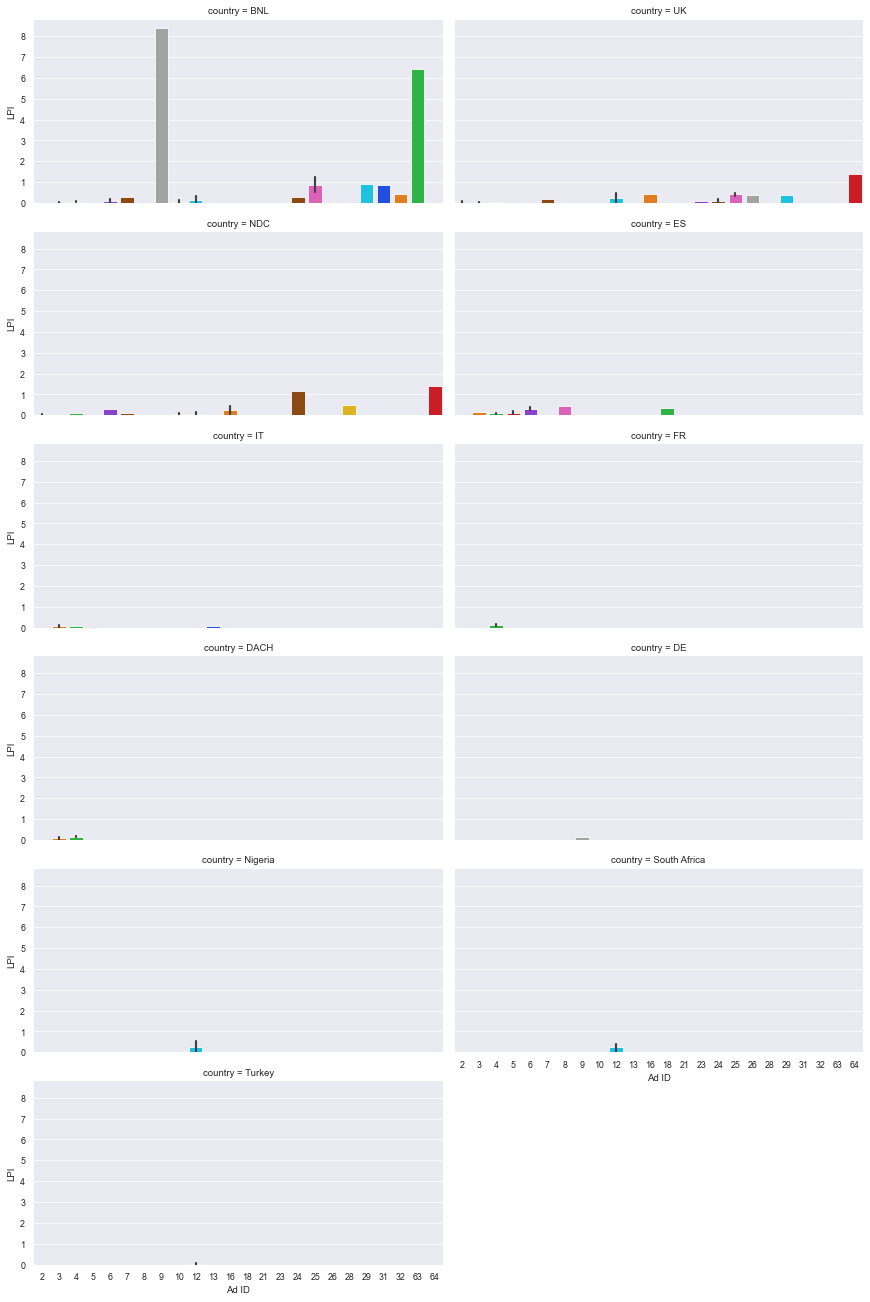

In [34]:
sns.catplot(x="Ad ID", y="LPI",
            col="country", kind = 'bar', data = ads_country,
            palette="bright", col_wrap=2, 
            height=3, aspect=2)
plt.show()

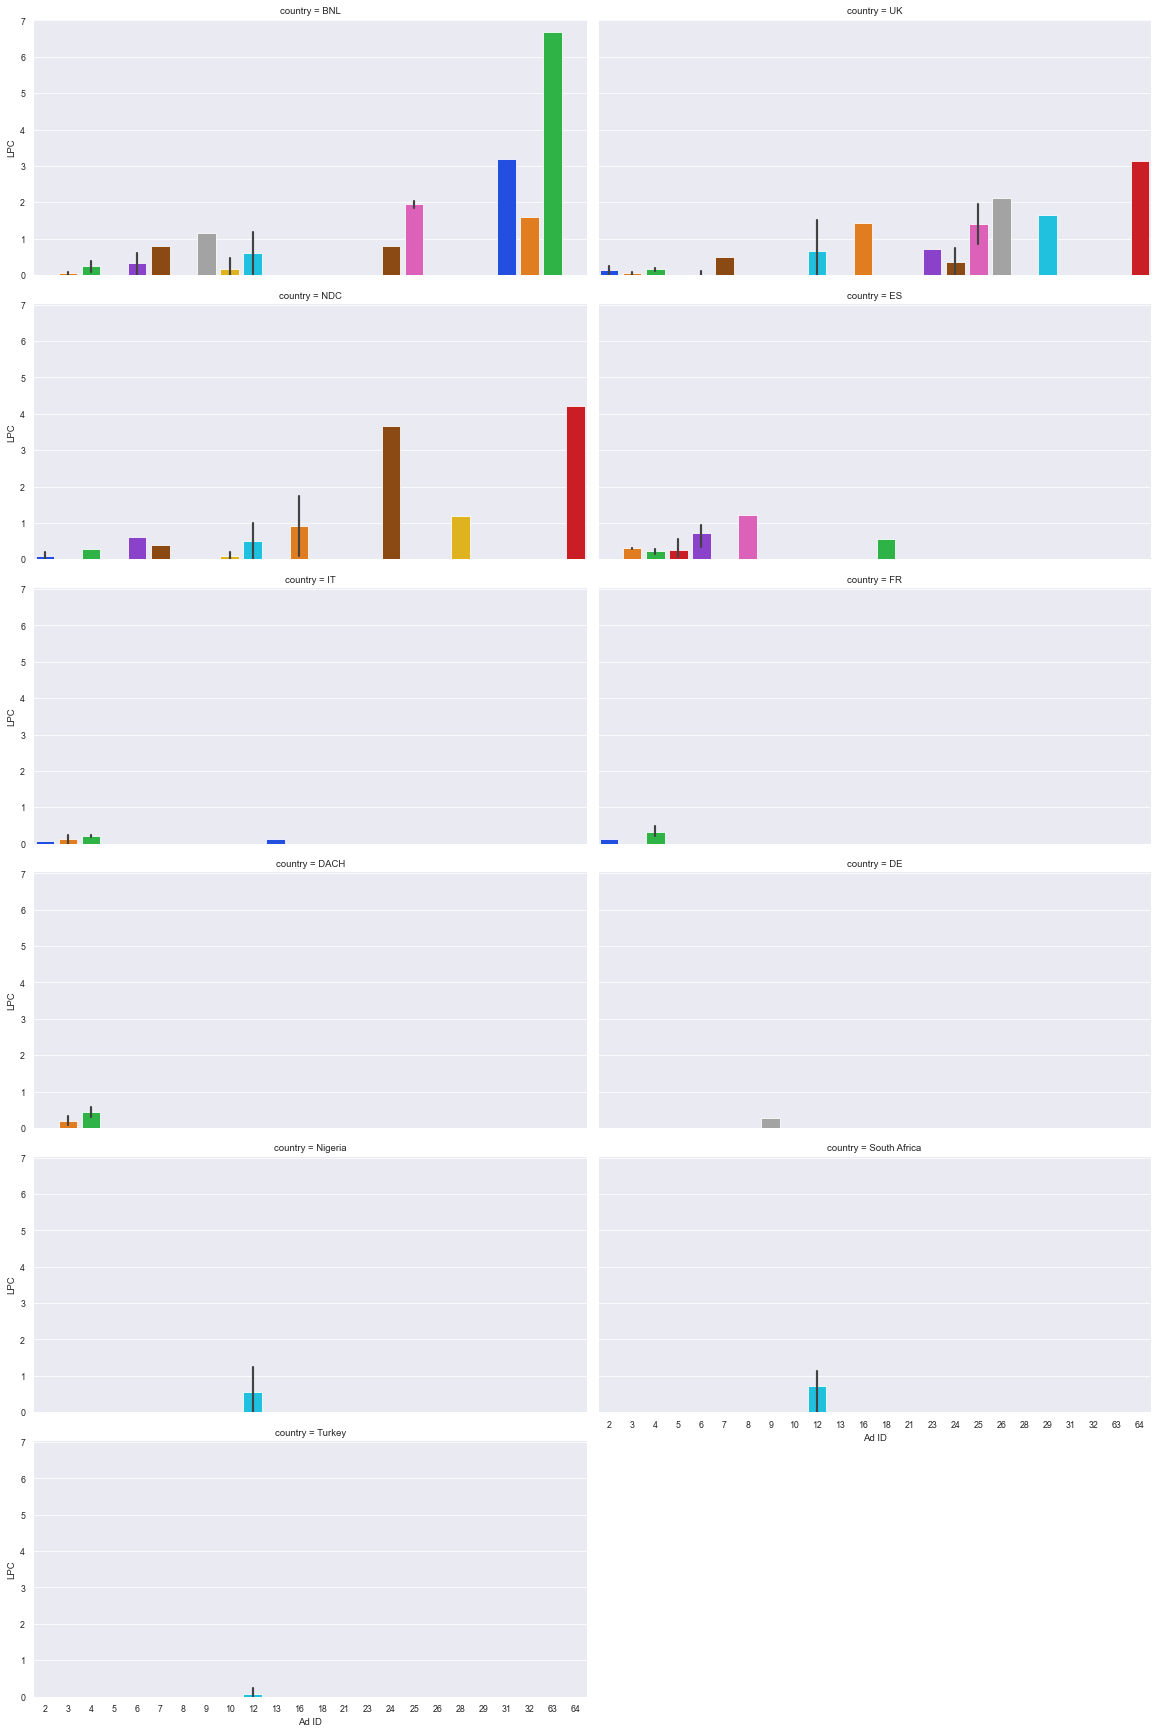

In [35]:
sns.catplot(x="Ad ID", y="LPC",
            col="country", kind = 'bar', data = ads_country,
            palette="bright", col_wrap=2, 
            height=4, aspect=2)
plt.show()

In [43]:
######### adding budget and Cost per lead for every campaign and country

ads_budget = df_campaign.groupby(['Campaign ID','country']).agg({'Ad ID':'count', 'LPI':'sum', 'LPC':'sum',
                                                                'Leads':'sum', 'Reach':'sum','LPR':'sum',
                                                                 'Total Social Actions':'sum','Cost per Lead':'sum',
                                                                'Total Budget':'sum'}).reset_index()

In [44]:
ads_budget

,Campaign ID,country,Ad ID,LPI,LPC,Leads,Reach,LPR,Total Social Actions,Cost per Lead,Total Budget
0,159178256,BNL,6,0.000000,0.000000,0,13206,0.000000,5,0.00,3354.0
1,159178306,BNL,3,0.000000,0.000000,0,14793,0.000000,411,0.00,1680.0
2,160610046,UK,2,0.000000,0.000000,0,27883,0.000000,33,0.00,1330.0
3,160615356,UK,2,0.125210,0.276754,32,44571,0.140783,319,89.07,2910.0
4,160615736,NDC,2,0.000000,0.000000,0,30360,0.000000,69,0.00,1470.0
...,...,...,...,...,...,...,...,...,...,...,...
107,182409894,BNL,6,0.193819,0.611111,3,6625,0.245941,15,212.34,7290.0
108,182411634,UK,6,0.000000,0.000000,0,8892,0.000000,14,0.00,8340.0
109,182411944,NDC,6,0.295057,0.600000,3,5000,0.329848,10,109.20,7290.0
110,182466574,ES,6,0.391269,0.907215,16,17354,0.456913,102,195.00,0.0


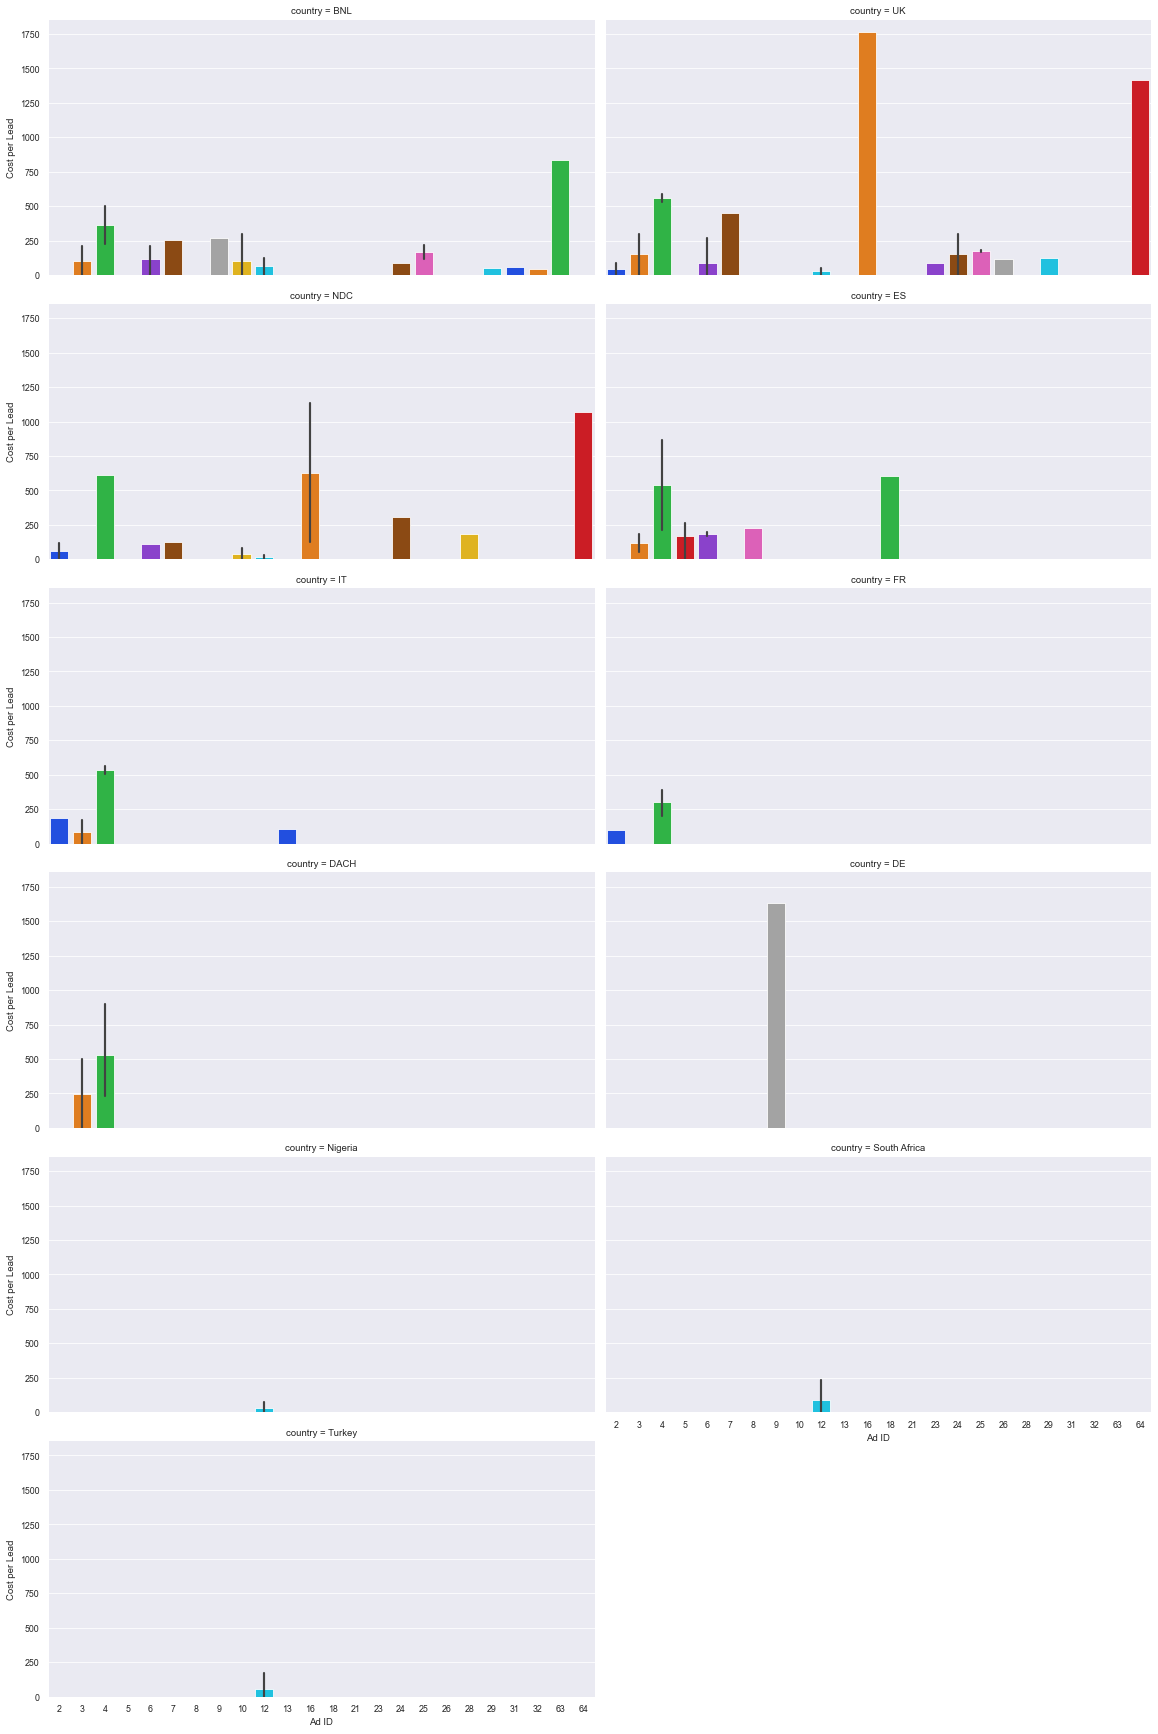

In [54]:
sns.catplot(x="Ad ID", y="Cost per Lead",
            col="country", kind = 'bar', data = ads_budget,
            palette="bright", col_wrap=2, 
            height=4, aspect=2)
plt.show()

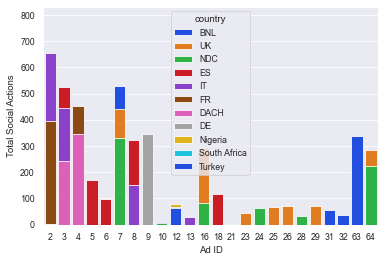

In [56]:
sns.barplot(x = "Ad ID" , y = "Total Social Actions", hue = 'country', dodge = False, 
            errwidth=0, data = ads_budget, palette="bright")
plt.show()

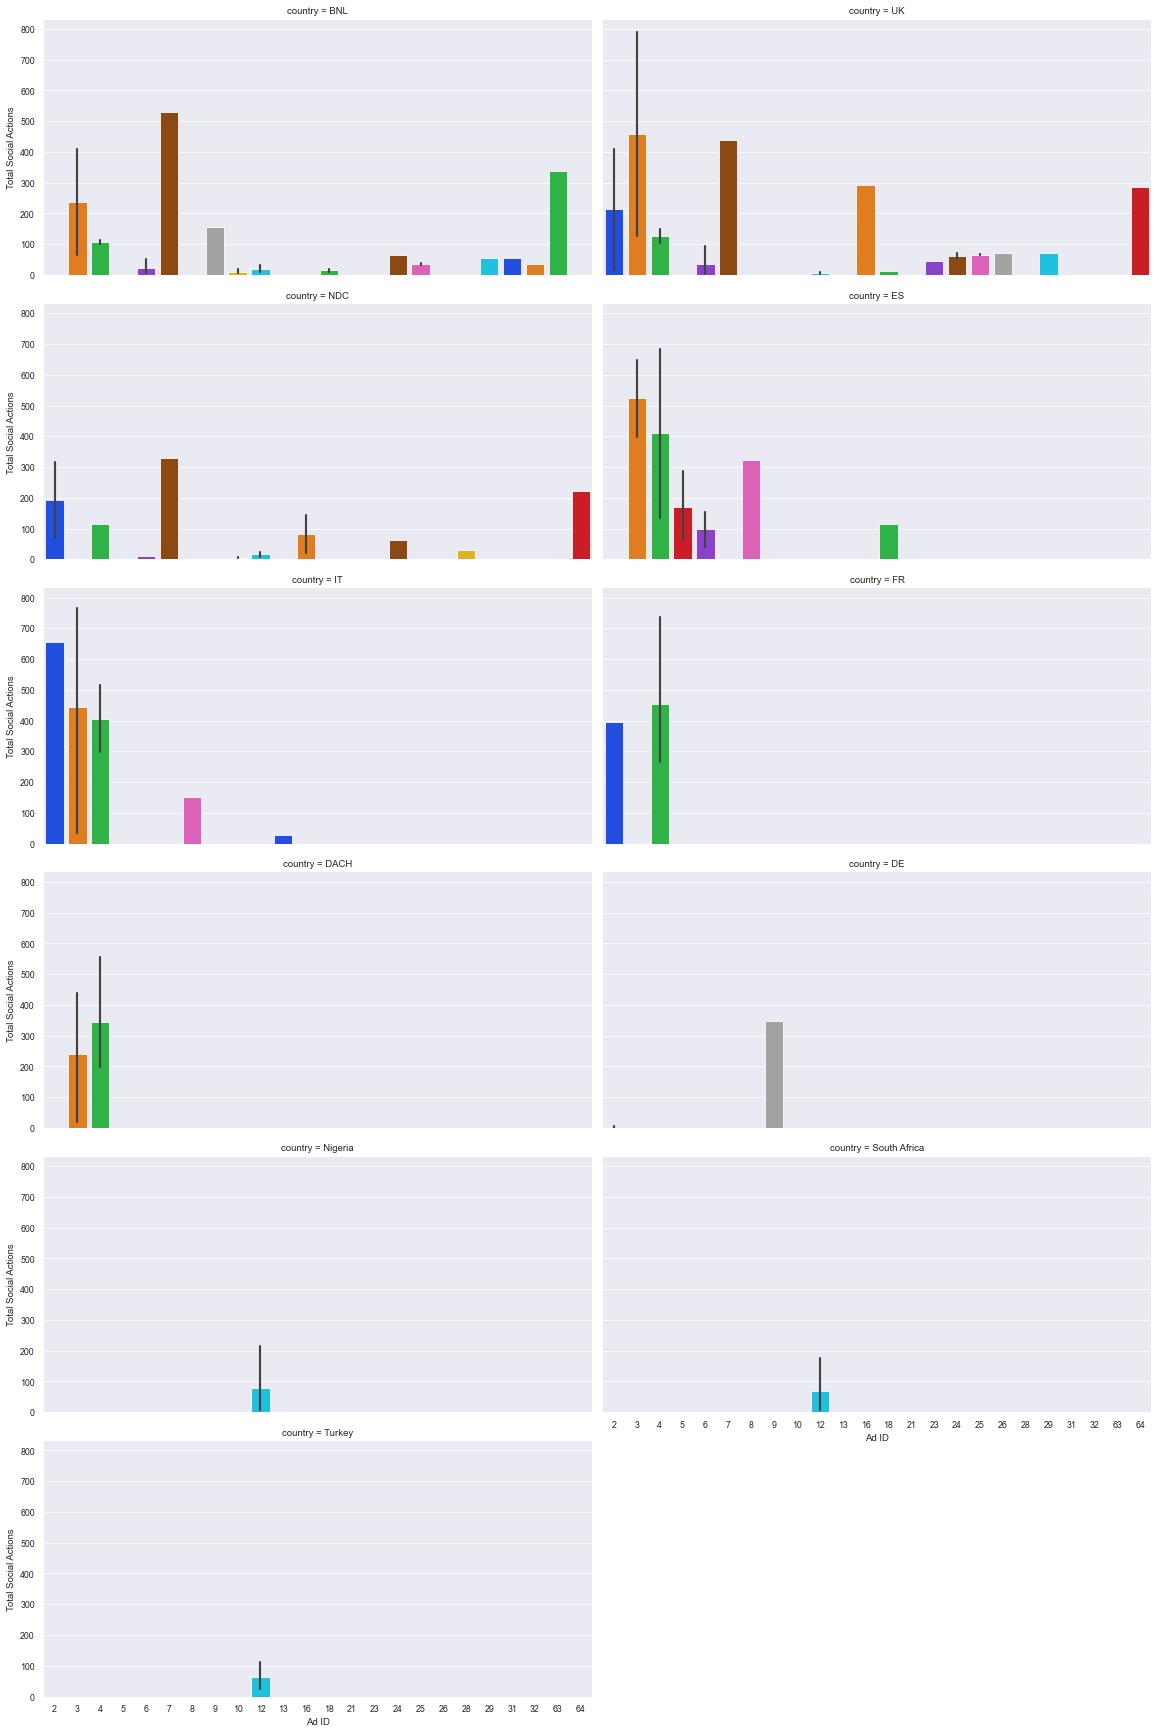

In [70]:
sns.catplot(x="Ad ID", y="Total Social Actions",
            col="country", kind = 'bar', data = ads_budget,
            palette="bright", col_wrap=2,
            height=4, aspect=2)
plt.show()

In [58]:
################################## new ############################################

In [63]:
ads_budget = df_campaign.groupby(['Campaign ID','country']).agg({'Ad ID':'count', 'LPI':'sum', 'LPC':'sum',
                                                                'Leads':'sum', 'Reach':'sum','LPR':'sum',
                                                                 'Total Social Actions':'sum','Cost per Lead':'sum',
                                                                'Total Budget':'sum'}).reset_index()

In [64]:
ads_budget = pd.DataFrame(ads_budget)

In [67]:
ads_budget.head()

,Campaign ID,country,Ad ID,LPI,LPC,Leads,Reach,LPR,Total Social Actions,Cost per Lead,Total Budget
0,159178256,BNL,6,0.00000,0.000000,0,13206,0.000000,5,0.00,3354.0
1,159178306,BNL,3,0.00000,0.000000,0,14793,0.000000,411,0.00,1680.0
2,160610046,UK,2,0.00000,0.000000,0,27883,0.000000,33,0.00,1330.0
3,160615356,UK,2,0.12521,0.276754,32,44571,0.140783,319,89.07,2910.0
4,160615736,NDC,2,0.00000,0.000000,0,30360,0.000000,69,0.00,1470.0


In [72]:
ads_budget["Ad ID"].value_counts()

12    18
4     15
2     13
3     12
6     10
10     6
18     4
5      4
25     4
24     4
7      3
16     3
9      2
8      2
29     2
64     2
63     1
13     1
21     1
23     1
26     1
28     1
31     1
32     1
Name: Ad ID, dtype: int64

In [97]:
### adding column for checking the length of Intro_text is < 200 or not
def function_adcount(row):
    if row['Ad ID'] <= 10:
        val = 1
    
    elif (row['Ad ID'] > 10 and row['Ad ID'] <= 15) :
        val = 2
        
    elif (row['Ad ID'] > 15 and row['Ad ID'] <= 25) :
        val = 3
    
    else:
        val = 4
    return val

ads_budget['Ad_range'] = ads_budget.apply(function_adcount, axis=1)

In [98]:
ads_budget.head()

,Campaign ID,country,Ad ID,LPI,LPC,Leads,Reach,LPR,Total Social Actions,Cost per Lead,Total Budget,Ad_range
0,159178256,BNL,6,0.00000,0.000000,0,13206,0.000000,5,0.00,3354.0,1
1,159178306,BNL,3,0.00000,0.000000,0,14793,0.000000,411,0.00,1680.0,1
2,160610046,UK,2,0.00000,0.000000,0,27883,0.000000,33,0.00,1330.0,1
3,160615356,UK,2,0.12521,0.276754,32,44571,0.140783,319,89.07,2910.0,1
4,160615736,NDC,2,0.00000,0.000000,0,30360,0.000000,69,0.00,1470.0,1


In [99]:
ads_budget.Ad_range.value_counts()

1    67
2    19
3    17
4     9
Name: Ad_range, dtype: int64

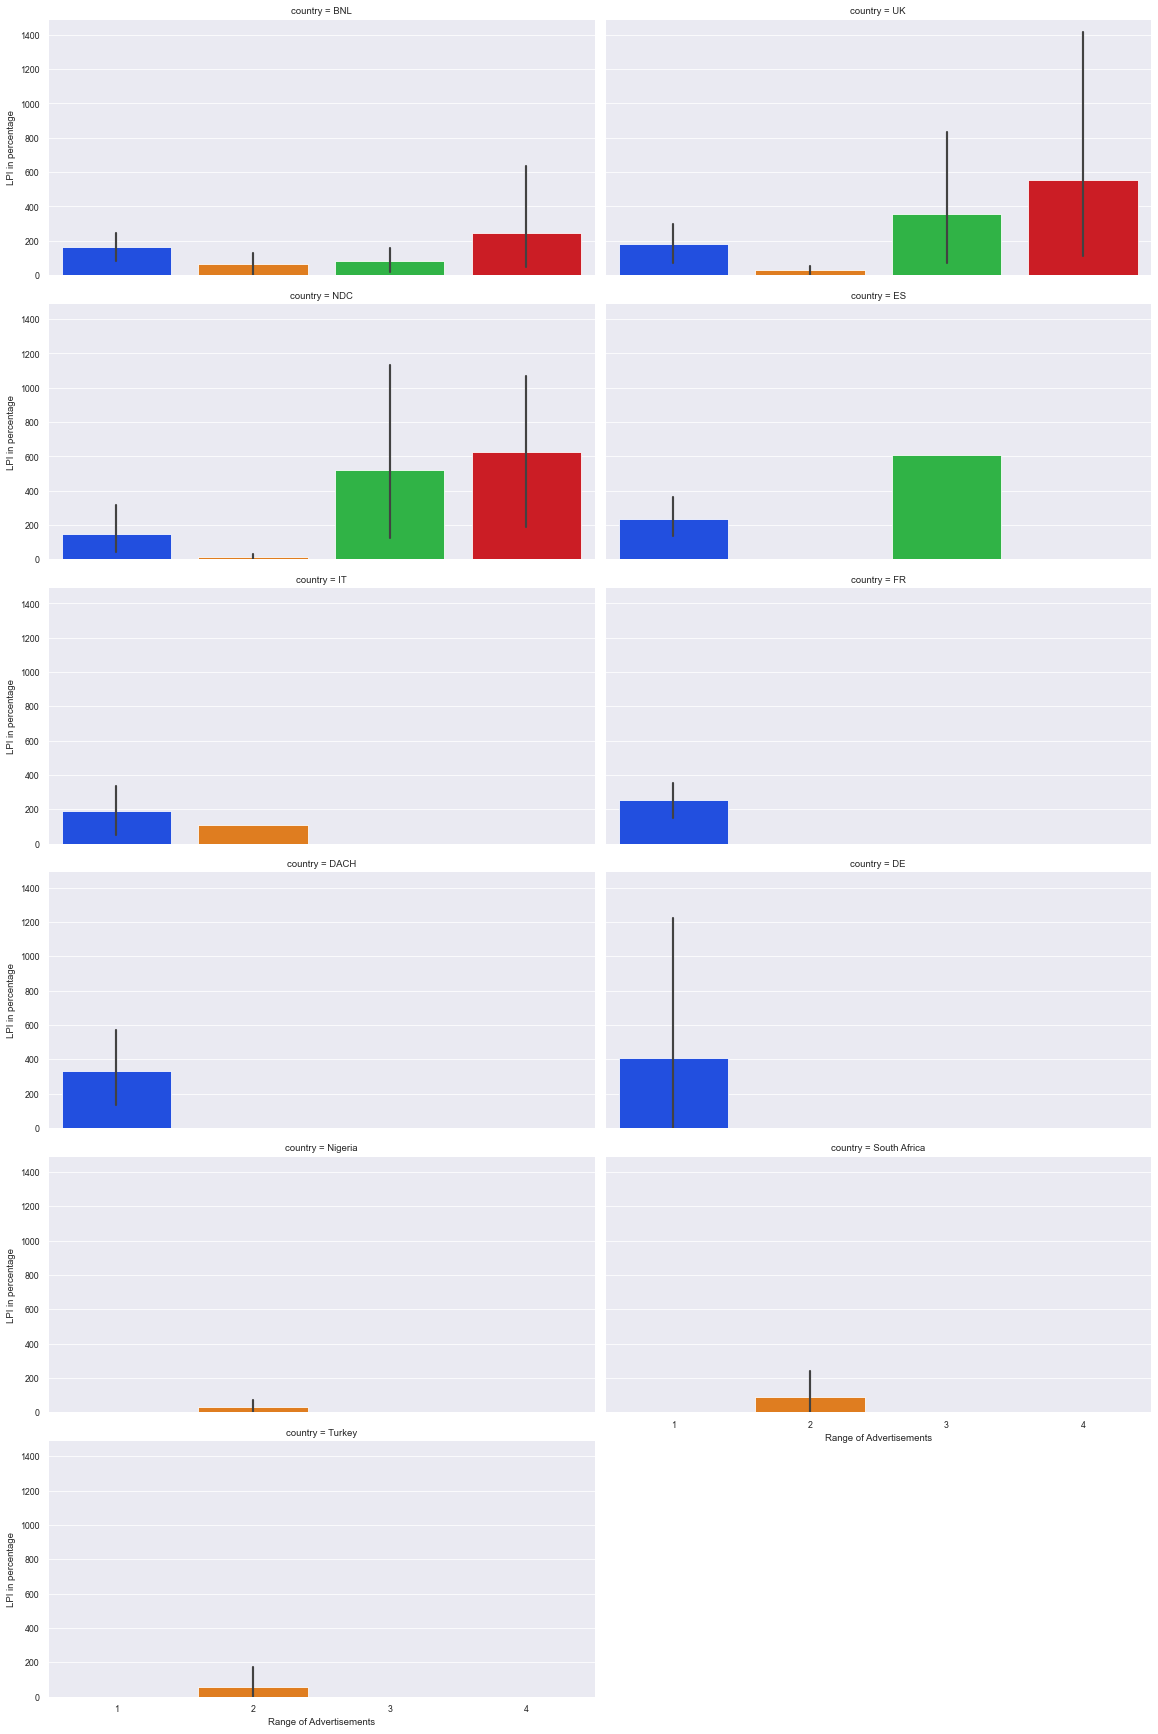

In [102]:

g = sns.catplot(x="Ad_range", y="Cost per Lead",
            col="country", kind = 'bar', data = ads_budget,
            palette="bright", col_wrap=2,
            height=4, aspect=2)
g.set_axis_labels("Range of Advertisements", "LPI in percentage")

plt.show()

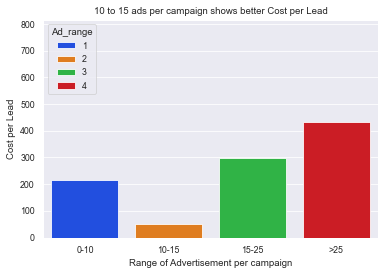

In [111]:
g = sns.barplot(x = "Ad_range" , y = "Cost per Lead", hue = 'Ad_range', dodge = False, 
            errwidth=0, data = ads_budget, palette="bright")
g.set_xticklabels(['0-10','10-15','15-25','>25'])
g.set_title('10 to 15 ads per campaign shows better Cost per Lead')
g.set_xlabel("Range of Advertisement per campaign")
plt.show()


In [ ]:
g = sns.barplot(x = "Ad_range" , y = "Cost per Lead", hue = 'Ad_range', dodge = False, 
            errwidth=0, data = ads_budget, palette="bright")
g.set_xticklabels(['0-10','10-15','15-25','>25'])
plt.show()